# Uncle Linear Regression ML


In [ ]:
#https://github.com/PietYsabie/Python-Stock-Options-Loader.git
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 2 2021
@author: Piet Ysabie
"""
#_____________________________________________________________________________________
# Machine Learning for stock data screening
# Using Supervised learning - Linear Regression
# Load stock fundamentals from datafeed on https://www.unclestock.com/
#-------------------------------------------------------------------------------------


# Load the data

In [2]:
import os
import sklearn
import numpy as np
import pandas as pd

In [3]:
# read the local csv file with pandas

UNCLE_PATH = os.path.join("datasets", "uncle")
def load_uncledata_pd_data(uncledata_pd_path=UNCLE_PATH):
    csv_path = os.path.join(uncledata_pd_path, "aankopen All_cleaned - Copy AI 20022021.csv")
    return pd.read_csv(csv_path,sep=';' , decimal=",")

uncledata_pd = load_uncledata_pd_data()

# this is how the data looks
# pandas head returns the first n (default 5) rows for a quick sneak preview
uncledata_pd.head()

,UniqueID,fundamental_advice,fund_advice_nrscore,uncle_stock_score,growth_score,value_score,greenblatt_score,piotroski_score,levermann_score,predictability_score,price_iv_buffett,iv_price_buf,rev_price,PL12M
0,1,3,3,0.65,0.72,0.56,0.50,7.45,4.68,0.34,9.16,9.16,0.2602,-0.2018
1,2,5,5,0.78,0.68,0.65,0.30,7.67,7.75,0.35,NaN,NaN,1.5400,0.2757
2,3,4,4,0.69,0.56,0.60,0.54,8.44,-3.51,0.27,2.70,2.70,7.2700,-0.1526
3,4,3,3,0.66,0.68,0.53,0.21,7.61,4.63,0.41,1.10,1.10,0.1517,0.3262
4,5,4,4,0.74,0.57,0.64,1.00,9.44,2.52,0.42,0.87,0.87,2.5400,0.6686


In [4]:
# let's look at correlations of each feature with the stock gains after 1 year
corr_matrix = uncledata_pd.corr()
corr_matrix["PL12M"].sort_values(ascending=False)

PL12M                   1.000000
fundamental_advice      0.176301
levermann_score         0.174869
greenblatt_score        0.128210
fund_advice_nrscore     0.040571
piotroski_score         0.037524
growth_score            0.010581
uncle_stock_score       0.008042
value_score            -0.007096
rev_price              -0.016576
price_iv_buffett       -0.026995
iv_price_buf           -0.026995
predictability_score   -0.081559
UniqueID               -0.166781
Name: PL12M, dtype: float64

# Clean and prepare the data

In [5]:
# Data correction 1 - fill empty fields (1 feature only)
median = uncledata_pd["uncle_stock_score"].median()
uncledata_pd["uncle_stock_score"].fillna(median, inplace=True)
uncledata_pd.head()

,UniqueID,fundamental_advice,fund_advice_nrscore,uncle_stock_score,growth_score,value_score,greenblatt_score,piotroski_score,levermann_score,predictability_score,price_iv_buffett,iv_price_buf,rev_price,PL12M
0,1,3,3,0.65,0.72,0.56,0.50,7.45,4.68,0.34,9.16,9.16,0.2602,-0.2018
1,2,5,5,0.78,0.68,0.65,0.30,7.67,7.75,0.35,NaN,NaN,1.5400,0.2757
2,3,4,4,0.69,0.56,0.60,0.54,8.44,-3.51,0.27,2.70,2.70,7.2700,-0.1526
3,4,3,3,0.66,0.68,0.53,0.21,7.61,4.63,0.41,1.10,1.10,0.1517,0.3262
4,5,4,4,0.74,0.57,0.64,1.00,9.44,2.52,0.42,0.87,0.87,2.5400,0.6686


In [6]:
# Data cleaning - fill empty fields (entire dataframe at once) - using scikitlearn imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(uncledata_pd)
# show the median for each feature
print(imputer.statistics_)

# Attention, the converted Dataframe returns a numpy array format; convert it back to a pandas data array
X = imputer.transform(uncledata_pd)
uncledata_pd_filled = pd.DataFrame(X, columns=uncledata_pd.columns)
uncledata_pd = uncledata_pd_filled
uncledata_pd.head()

[2.2050000e+02 4.0000000e+00 4.0000000e+00 7.3000000e-01 6.4000000e-01
 5.7000000e-01 5.2000000e-01 7.5400000e+00 3.6700000e+00 6.3000000e-01
 1.3700000e+00 1.3700000e+00 8.7330000e-01 9.0879347e-02]


,UniqueID,fundamental_advice,fund_advice_nrscore,uncle_stock_score,growth_score,value_score,greenblatt_score,piotroski_score,levermann_score,predictability_score,price_iv_buffett,iv_price_buf,rev_price,PL12M
0,1.0,3.0,3.0,0.65,0.72,0.56,0.50,7.45,4.68,0.34,9.16,9.16,0.2602,-0.2018
1,2.0,5.0,5.0,0.78,0.68,0.65,0.30,7.67,7.75,0.35,1.37,1.37,1.5400,0.2757
2,3.0,4.0,4.0,0.69,0.56,0.60,0.54,8.44,-3.51,0.27,2.70,2.70,7.2700,-0.1526
3,4.0,3.0,3.0,0.66,0.68,0.53,0.21,7.61,4.63,0.41,1.10,1.10,0.1517,0.3262
4,5.0,4.0,4.0,0.74,0.57,0.64,1.00,9.44,2.52,0.42,0.87,0.87,2.5400,0.6686


In [7]:
# fix np.random.seed() to force numpy to start from the given 'seed' number and therefore always end up with the same 'random' numbers
# to make this notebook's output identical at every run
# remove at real run but while debugging it can be handy to have each time the same 'random' numbers

np.random.seed(42)

In [8]:
# we use numpy to simulate the same split
# splits the total set of data into two 'random' sets for training and testing
# resulting 2 sets are still pandas dataframes!
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(uncledata_pd, 0.2)

In [9]:
# Show 5 records of the training set
train_set.head()

,UniqueID,fundamental_advice,fund_advice_nrscore,uncle_stock_score,growth_score,value_score,greenblatt_score,piotroski_score,levermann_score,predictability_score,price_iv_buffett,iv_price_buf,rev_price,PL12M
328,423.0,0.0,3.0,0.63,0.59,0.48,0.15,9.67,1.59,0.77,1.18,1.18,0.0644,0.399158
179,224.0,5.0,5.0,0.82,0.66,0.68,0.76,7.51,1.60,0.73,0.16,0.16,2.0000,-0.212100
340,435.0,1.0,4.0,0.85,0.87,0.58,0.52,7.46,1.65,0.76,1.82,1.82,0.1422,0.015741
82,83.0,5.0,5.0,0.78,0.63,0.54,0.92,7.42,-1.56,0.71,1.32,1.32,0.2159,0.611100
16,17.0,4.0,4.0,0.72,0.60,0.64,1.71,8.77,6.82,0.22,4.42,4.42,1.2100,2.589400


In [10]:
# show 5 records of the test set
test_set.head()

,UniqueID,fundamental_advice,fund_advice_nrscore,uncle_stock_score,growth_score,value_score,greenblatt_score,piotroski_score,levermann_score,predictability_score,price_iv_buffett,iv_price_buf,rev_price,PL12M
228,273.0,5.0,5.0,0.77,0.49,0.63,0.96,7.44,0.52,0.86,0.24,0.24,0.8161,0.1570
116,161.0,5.0,5.0,0.79,0.71,0.66,0.73,7.59,8.87,0.77,2.10,2.10,2.0300,0.2007
55,56.0,4.0,4.0,0.73,0.72,0.57,0.50,6.38,7.68,0.38,0.54,0.54,0.4738,-0.6355
155,200.0,4.0,4.0,0.69,0.68,0.56,0.34,9.46,0.57,0.78,1.12,1.12,1.5600,0.3165
110,111.0,4.0,4.0,0.75,0.66,0.57,0.39,7.42,3.54,0.68,2.42,2.42,0.8283,0.4431


In [11]:
# separate labels (the y-values) for training set (but keep the values in a separate serie)
uncledata_train_pd = train_set.drop("PL12M", axis=1) 
uncledata_train_serie_labels = train_set["PL12M"].copy()

# Select and train the regression algorithm

In [12]:
# this is the complete model-building AND fit to the training data set using linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(uncledata_train_pd, uncledata_train_serie_labels)

LinearRegression()

In [13]:
# check the RMSE on the training sample
from sklearn.metrics import mean_squared_error
uncledata_train_np_predictions = lin_reg.predict(uncledata_train_pd)
lin_mse = mean_squared_error(uncledata_train_serie_labels, uncledata_train_np_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4536518317623084

In [14]:
# check the RMSE on the test sample

uncledata_test_pd = test_set.drop("PL12M", axis=1) 
uncledata_test_serie_labels = test_set["PL12M"].copy()
uncledata_test_np_predictions = lin_reg.predict(uncledata_test_pd)
lin_mse = mean_squared_error(uncledata_test_serie_labels, uncledata_test_np_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4140071722584386

# Trained model results

Feature: UniqueID,0.00005
Feature: fundamental_advice,0.08205
Feature: fund_advice_nrscore,-0.06396
Feature: uncle_stock_score,-0.40561
Feature: growth_score,-0.34044
Feature: value_score,0.06725
Feature: greenblatt_score,0.16203
Feature: piotroski_score,0.00465
Feature: levermann_score,0.02880
Feature: predictability_score,-0.15205
Feature: price_iv_buffett,-0.00000
Feature: iv_price_buf,-0.00000
Feature: rev_price,-0.00028


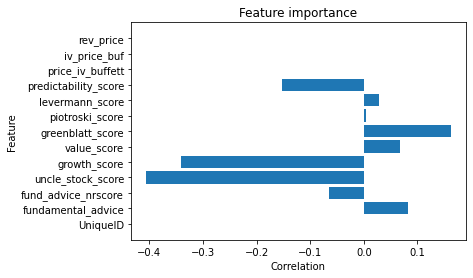

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

num_attribs = list(uncledata_test_pd) # list of names of the features
importance = lin_reg.coef_  # this returns a numpy array with the coefficients (theta's)
# print list of feature importance
for i,v in enumerate(importance):
    print('Feature: %s,%.5f' % (num_attribs[i],v))
    
# plot feature importance
plt.barh(num_attribs,importance)
plt.title('Feature importance')
plt.ylabel('Feature')
plt.xlabel('Correlation')
plt.show()

In [16]:
# we can check the prediction of a few samples in the last (=test) set with lin_reg.predict([some_digit])

some_data = uncledata_test_pd.iloc[:5]
some_labels = uncledata_test_serie_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))

print("Labels:", list(some_labels))

Predictions: [0.25435749 0.38461462 0.35834517 0.11774905 0.19567018]
Labels: [0.157, 0.2007, -0.6355, 0.3165, 0.4431]


# x-y scatter plot with labels vs predictions

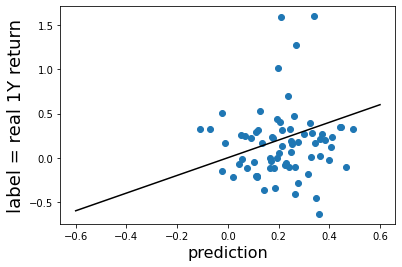

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot the real returns vs the predictions 
plt.scatter(uncledata_test_np_predictions,uncledata_test_serie_labels)

# also plot the 'perfect predictor model' straight diagonal line
plt.plot([-0.6, 0.6], [-0.6, 0.6], 'k-')
plt.ylabel('label = real 1Y return', fontsize=18)
plt.xlabel('prediction', fontsize=16)
plt.show()


# Prediction portfolio return vs real portfolio return

In [18]:
# we put predictions and original data (including real y values) in one dataframe and sort it
# note that the labels (real y) are a serie, and the predictions are a np array
# convert predictions into a dataframe and add a column title
predictions_pd = pd.DataFrame(uncledata_test_np_predictions)
predictions_pd.columns =['PL_Predict']

In [19]:
# before concatenating both structures, make sure they align to avoid NaN, see
# https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
predictions_pd.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

result_pd = pd.concat([test_set,predictions_pd],axis=1)
result_pd.head()

,UniqueID,fundamental_advice,fund_advice_nrscore,uncle_stock_score,growth_score,value_score,greenblatt_score,piotroski_score,levermann_score,predictability_score,price_iv_buffett,iv_price_buf,rev_price,PL12M,PL_Predict
0,273.0,5.0,5.0,0.77,0.49,0.63,0.96,7.44,0.52,0.86,0.24,0.24,0.8161,0.1570,0.254357
1,161.0,5.0,5.0,0.79,0.71,0.66,0.73,7.59,8.87,0.77,2.10,2.10,2.0300,0.2007,0.384615
2,56.0,4.0,4.0,0.73,0.72,0.57,0.50,6.38,7.68,0.38,0.54,0.54,0.4738,-0.6355,0.358345
3,200.0,4.0,4.0,0.69,0.68,0.56,0.34,9.46,0.57,0.78,1.12,1.12,1.5600,0.3165,0.117749
4,111.0,4.0,4.0,0.75,0.66,0.57,0.39,7.42,3.54,0.68,2.42,2.42,0.8283,0.4431,0.195670


In [20]:
result_sorted_pd = result_pd.sort_values(by=['PL_Predict'], ascending=False)

In [21]:
# average returns of the predictions and of the original returns
result_sorted_pd["PL_Predict"].mean(axis=0),result_sorted_pd["PL12M"].mean(axis=0)

(0.21684791432056685, 0.16105652352857144)

In [22]:
# average REAL return of the top N best PREDICTED stock picks

N = 30
result_sorted_pd.iloc[:N, result_sorted_pd.columns.get_loc('PL12M')].mean()

0.17542666666666668